# Test the Qlearner attacker in the little environment

-   initialisation of the environment
-   initialisation of the Qlearner agent

In [1]:
from cyberbattle.agents.battle_environment import CyberBattleEnv
from cyberbattle.env.samples.little_network import get_little_environment_network, Dev, DSI

num_client = 5
net = get_little_environment_network(num_client)
profiles = {
    DSI(num_client): 1,
    Dev(num_client): num_client - 1
}
env = CyberBattleEnv(net, profiles, attacker_goal={'reward': 0, 'flag': 2})

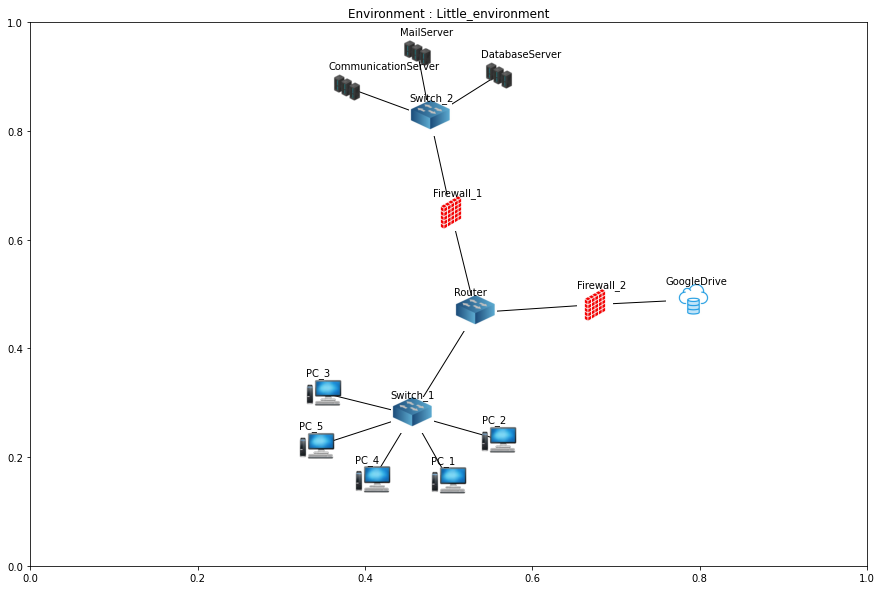

In [2]:
env.display_network()

In [3]:
env.attacker_description()

The attacker can performed the following attacks classified by their index :
{0: 'System Service Discovery', 1: 'Browser Session Hijacking', 2: 'Network Service Scanning', 3: 'Brute Force'}

These attacks can be performed and allow the attacker to get outcomes as follows :
{'PC_1': {}, 'PC_2': {}, 'PC_3': {}, 'PC_4': {'System Service Discovery': {'data sources triggered': 'Process', 'phase name': 'discovery', 'Type': 'Local'}}, 'PC_5': {'Brute Force': {'data sources triggered': 'User Account', 'phase name': 'credential-access', 'Type': 'Remote'}}, 'Switch_1': {}, 'Switch_2': {}, 'Router': {}, 'DatabaseServer': {'Browser Session Hijacking': {'data sources triggered': 'Logon Session', 'phase name': 'collection', 'Type': 'Local'}}, 'MailServer': {'Network Service Scanning': {'data sources triggered': 'Cloud Service', 'phase name': 'discovery', 'Type': 'Local'}}, 'CommunicationServer': {}, 'GoogleDrive': {'Brute Force': {'data sources triggered': 'User Account', 'phase name': 'credential-a

In [4]:
from cyberbattle.agents.attacker.baseline.qlearning import Qlearner
from cyberbattle.agents.simulation import Simulation
from cyberbattle.utils.functions import exponential_espilon_decrease

decrease_function = exponential_espilon_decrease(0.01, 5000)

qleaner_agent = Qlearner(bounds=env.get_attacker_bounds(), features=['All'], gamma=0.015, hash_size=500, learning_rate=0.01)

simulation = Simulation(env)
simulation.compile(training_method='epsilon greedy search', simulation_type='Agent vs Nothing')

Training the agent Qlearner
with parameters : n_states=500, n_actions=20, learning_rate=0.01, gamma=0.015.
against nothing.
Epsilon greedy search parameters : max_iteration=600, epochs=100 and epsilon=0.9.

Epoch : 1/100, epsilon = 0.9
600/600 [==============================] - 0s 321us/iteration - cumulate rewards: 5615.0 - sucessfull actions count: 13 - failed actions count: 186 - infected machines count: 3 - model loss: 38.971672255319156            

Epoch ended at 216 iterations - Exploit deflected to explore count : 16 - Submarine action count : 17. 

###################

Epoch : 2/100, epsilon = 0.8625411371596573
600/600 [==============================] - 0s 201us/iteration - cumulate rewards: 5206.0 - sucessfull actions count: 33 - failed actions count: 228 - infected machines count: 3 - model loss: 34.186955077841674              

Epoch ended at 275 iterations - Exploit deflected to explore count : 13 - Submarine action count : 14. 

###################

Epoch : 3/100, epsil

No handles with labels found to put in legend.
No handles with labels found to put in legend.


600/600 [==============================] - 0s 92us/iteration - cumulate rewards: 6822.0 - sucessfull actions count: 7 - failed actions count: 56 - infected machines count: 3 - model loss: 81.0252104318921                

Epoch ended at 69 iterations - Exploit deflected to explore count : 48 - Submarine action count : 6. 

###################



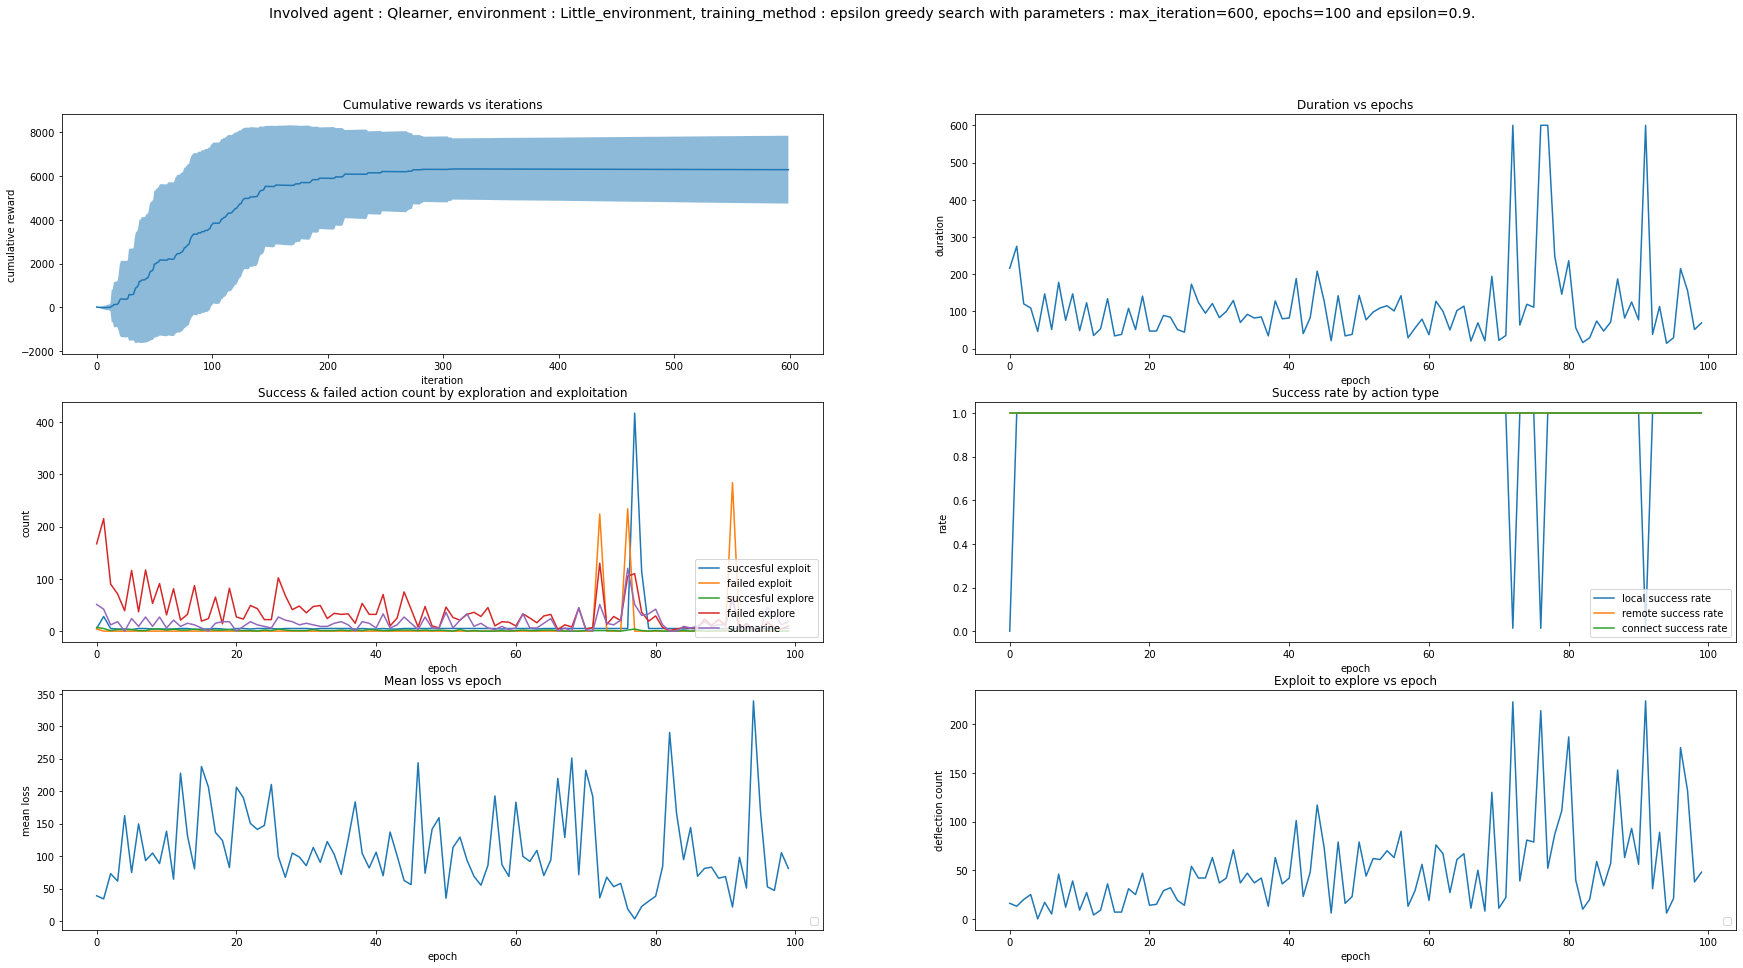

Details of a sample attack :



Number of exploit deflected to explore : 22.


In [5]:
simulation.run(
    max_iteration=600,
    epochs=100,
    attacker=qleaner_agent,
    verbose=1,
    decrease_function=decrease_function,
    sample_attack=True
)

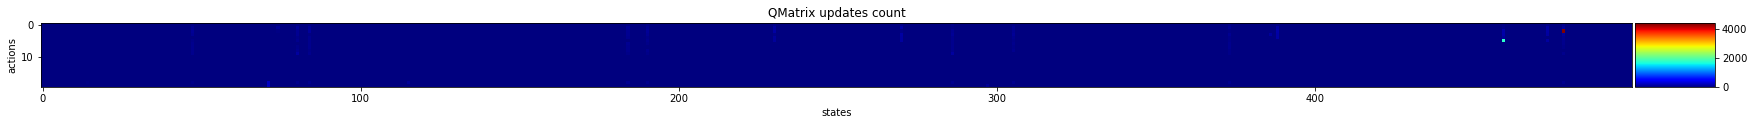

In [6]:
qleaner_agent.plot_q_updates_history()